
Regressão 1: Área (m²) vs Valor do Aluguel (R$)
Intercepto: 1268.39
Coeficiente: 17.83
Coef. de determinação (R²): 0.4481
Coef. de Pearson: 0.6694


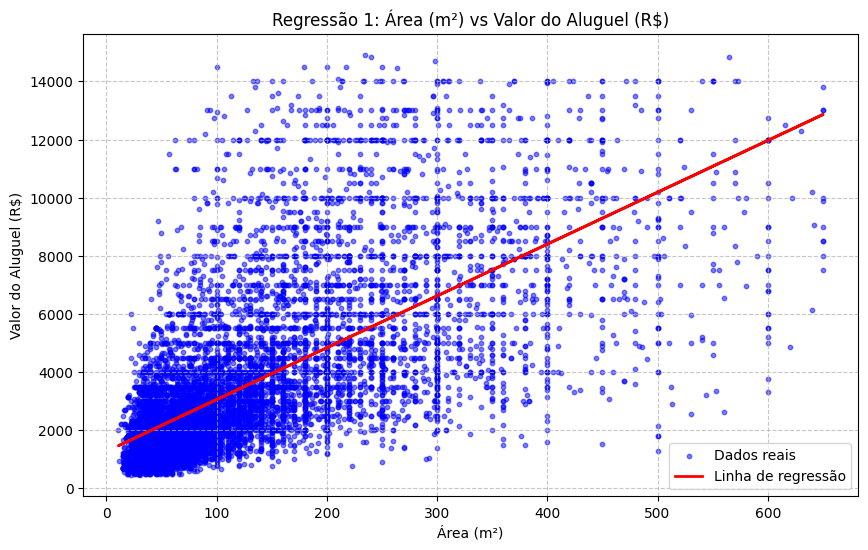


Regressão 2: Quartos vs Valor Total (R$)
Intercepto: -263.11
Coeficiente: 2143.82
Coef. de determinação (R²): 0.3184
Coef. de Pearson: 0.5642


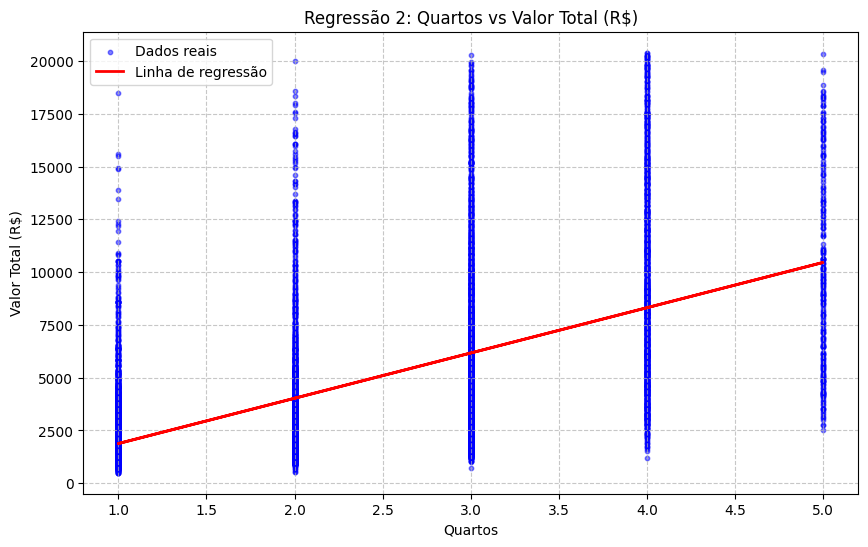


Regressão 3: Seguro Incêndio (R$) vs Valor do Aluguel (R$)
Intercepto: 121.07
Coeficiente: 70.78
Coef. de determinação (R²): 0.9737
Coef. de Pearson: 0.9868


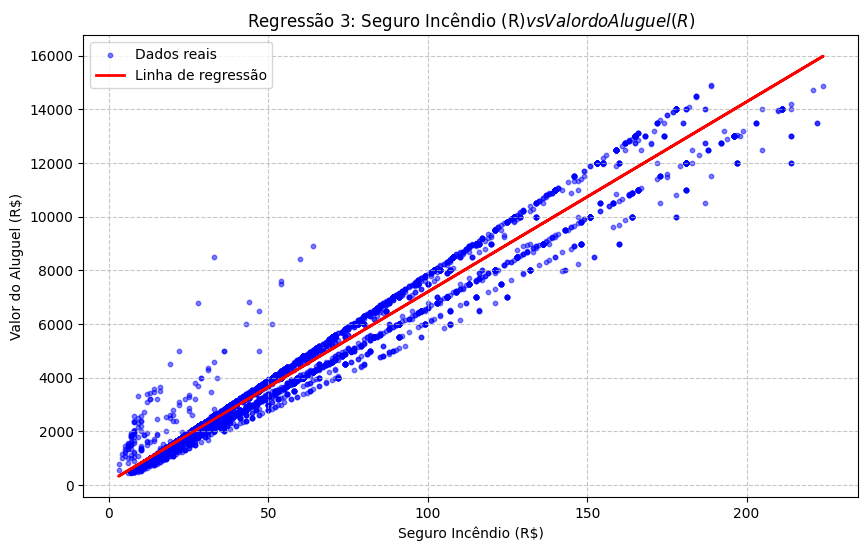


Regressão 4: Condomínio (R$) vs Valor do Aluguel (R$)
Intercepto: 2461.04
Coeficiente: 1.34
Coef. de determinação (R²): 0.1863
Coef. de Pearson: 0.4316


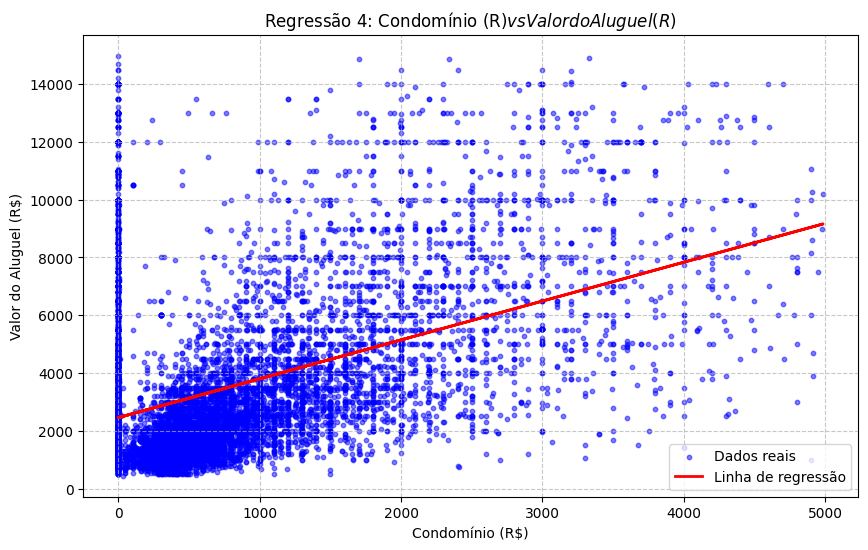


Regressão 5: Área (m²) vs IPTU (R$)
Intercepto: -43.66
Coeficiente: 2.50
Coef. de determinação (R²): 0.4366
Coef. de Pearson: 0.6608


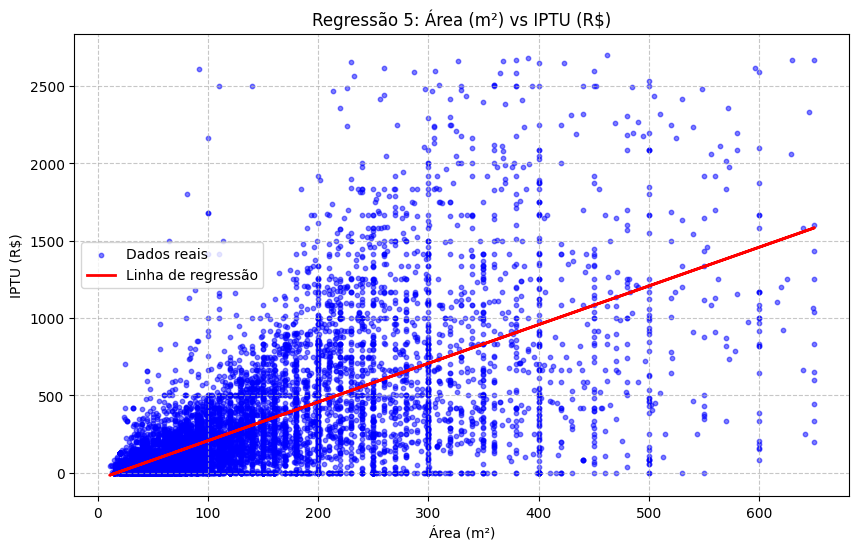

In [ ]:
# 
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Carregar dados
dados = pd.read_csv('./houses_to_rent_v2.csv', header=0)

# Renomear as colunas para português
dados.rename(columns={
    'area': 'Área (m²)',
    'rent amount (R$)': 'Valor do Aluguel (R$)',
    'rooms': 'Quartos',
    'total (R$)': 'Valor Total (R$)',
    'bathroom': 'Banheiros',
    'hoa (R$)': 'Condomínio (R$)',
    'parking spaces': 'Vagas de Garagem',
    'property tax (R$)': 'IPTU (R$)',
    'fire insurance (R$)': 'Seguro Incêndio (R$)'
}, inplace=True)

# Definir pares de colunas para x (variável independente) e y (variável dependente)
pares_de_colunas = [
    ('Área (m²)', 'Valor do Aluguel (R$)'),
    ('Quartos', 'Valor Total (R$)'),
    ('Seguro Incêndio (R$)', 'Valor do Aluguel (R$)'),
    ('Condomínio (R$)', 'Valor do Aluguel (R$)'),
    ('Área (m²)', 'IPTU (R$)')
]

# Executar regressões lineares e exibir resultados
for i, (coluna_x, coluna_y) in enumerate(pares_de_colunas, start=1):
    # Filtrar dados para remover outliers
    dados_filtrados = dados[(dados[coluna_x] < dados[coluna_x].quantile(0.99)) & 
                            (dados[coluna_y] < dados[coluna_y].quantile(0.99))]
    
    x = dados_filtrados[coluna_x]
    y = dados_filtrados[coluna_y]
    
    # Ajustar dados para o formato necessário
    X = np.array(x).reshape(-1, 1)
    Y = y.to_numpy()
    
    # Criar e ajustar o modelo de regressão linear
    modelo = LinearRegression().fit(X, Y)
    y_pred = modelo.predict(X)
    
    # Calcular coeficientes e métricas
    intercepto = modelo.intercept_
    coeficiente = modelo.coef_[0]
    R2 = r2_score(Y, y_pred)
    correlacao_pearson, _ = pearsonr(X.flatten(), Y)
    
    # Exibir resultados
    print(f"\nRegressão {i}: {coluna_x} vs {coluna_y}")
    print(f"Intercepto: {intercepto:.2f}")
    print(f"Coeficiente: {coeficiente:.2f}")
    print(f"Coef. de determinação (R²): {R2:.4f}")
    print(f"Coef. de Pearson: {correlacao_pearson:.4f}")
    
    # Plotar gráfico de dispersão com linha de regressão
    plt.figure(figsize=(10, 6))
    plt.scatter(X, Y, color="blue", s=10, alpha=0.5, label="Dados reais")
    plt.plot(X, y_pred, color="red", linewidth=2, label="Linha de regressão")
    
    # Ajustar escala logarítmica, se necessário
    if X.min() > 0 and Y.min() > 0:  # Verifica se os valores são maiores que zero
        if (X.max() / X.min() > 100) or (Y.max() / Y.min() > 100):  # Condição para diferença significativa de escala
            plt.xscale('log')
            plt.yscale('log')
    
    plt.xlabel(coluna_x)
    plt.ylabel(coluna_y)
    plt.title(f"Regressão {i}: {coluna_x} vs {coluna_y}")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [4]:
import pandas as pd
import statsmodels.api as sm

# Carregar os dados
dados = pd.read_csv('./houses_to_rent_v2.csv')

# Renomear as colunas para português
dados.rename(columns={
    'area': 'Área (m²)',
    'rent amount (R$)': 'Valor do Aluguel (R$)',
    'rooms': 'Quartos',
    'total (R$)': 'Valor Total (R$)',
    'bathroom': 'Banheiros',
    'hoa (R$)': 'Condomínio (R$)',
    'parking spaces': 'Vagas de Garagem',
    'property tax (R$)': 'IPTU (R$)',
    'fire insurance (R$)': 'Seguro Incêndio (R$)'
}, inplace=True)

# Filtragem de outliers (Percentil 99) para evitar distorção no modelo
for coluna in ['Área (m²)', 'Quartos', 'Banheiros', 'Condomínio (R$)']:
    limiar = dados[coluna].quantile(0.99)
    dados = dados[dados[coluna] <= limiar]

# Definir as variáveis independentes (X) e a variável dependente (y)
X = dados[['Área (m²)', 'Quartos', 'Banheiros', 'Condomínio (R$)']]
y = dados['Valor Total (R$)']

# Adicionar uma constante para o modelo (intercepto)
X = sm.add_constant(X)

# Criar e ajustar o modelo de regressão linear múltipla (Modelo Completo)
modelo_completo = sm.OLS(y, X).fit()

# Exibir os resultados do modelo completo
print("Resultados da Regressão Linear Múltipla (Modelo Completo):")
print(modelo_completo.summary())

# Selecionar apenas variáveis significativas (p-valor < 0.05)
variaveis_significativas = [col for col, p_val in modelo_completo.pvalues.items() if p_val < 0.05 and col != 'const']

# Criar o modelo simplificado usando apenas variáveis significativas
X_significativas = dados[variaveis_significativas]
X_significativas = sm.add_constant(X_significativas)  # Adicionar a constante novamente
modelo_simplificado = sm.OLS(y, X_significativas).fit()

# Exibir os resultados do modelo simplificado
print("\nResultados da Regressão Linear Múltipla (Apenas Variáveis Significativas):")
print(modelo_simplificado.summary())



Resultados da Regressão Linear Múltipla (Modelo Completo):
                            OLS Regression Results                            
Dep. Variable:       Valor Total (R$)   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     1964.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        08:53:58   Log-Likelihood:                -99843.
No. Observations:               10326   AIC:                         1.997e+05
Df Residuals:                   10321   BIC:                         1.997e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------